In [1]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from collections import Counter
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

filtered_inf = pd.read_csv('filtered_inf.csv')

def transform(val): #function used in generating wordcloud to show the white parts
    if val == 1:
        return 255
    else:
        return val
    

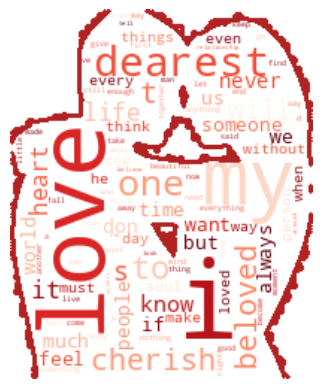

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["<NAME>","NAME", 'name','the','and', 'as','of'])
    
lovers_mask = np.array(Image.open("lovers_mask.png"))
transformed_lovers_mask = np.ndarray((lovers_mask.shape[0],lovers_mask.shape[1]), np.int32)
for i in range(len(lovers_mask)):
  transformed_lovers_mask[i] = list(map(transform, lovers_mask[i]))
    
quotes = filtered_inf['quote'].tolist()
words = [word.lower() for quote in quotes for word in re.findall(r'\b\w+\b', quote) if word not in stopwords]
word_counts = Counter(words)

cloud = WordCloud(max_words=100, background_color='white', colormap='Reds', stopwords=stopwords, mask=transformed_lovers_mask, contour_width=3, contour_color='firebrick').generate_from_frequencies(word_counts)    
    #fig, ax = plt.subplots()
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
print(stopwords)

{'here', 'a', 'ourselves', 'had', 'same', "they're", 'that', 'then', 'more', 'ought', "there's", 'my', 'therefore', 'get', 'yourself', 'under', 'were', 'himself', 'would', "i'll", 'did', 'been', "they've", "why's", 'your', "haven't", 'he', "let's", "we've", 'its', 'or', 'those', 'herself', "you've", 'me', 'these', 'otherwise', "can't", 'of', 'can', 'their', 'again', 'our', 'it', 'doing', "didn't", 'not', 'any', 'is', 'you', 'on', 'about', '<NAME>', 'by', "hadn't", "aren't", 'all', 'whom', 'cannot', "you'd", "you'll", "that's", 'myself', 'this', "shan't", 'with', 'are', 'most', "shouldn't", 'was', 'am', 'during', 'few', "he'd", 'i', "she'll", "it's", "when's", 'through', 'com', 'each', 'since', 'also', "don't", "wasn't", "hasn't", "isn't", 'other', "they'll", 'but', 'because', 'as', 'both', "we'll", 'over', 'name', 'could', 'above', 'itself', 'only', 'which', "i'm", 'in', 'until', 'NAME', 'own', 'how', 'they', 'www', 'while', 'further', 'like', 'and', "here's", 'them', 'him', 'an', 'htt

In [9]:
cloud.to_file('wordcloud.png')